# My Fast.ai Journey - CV: Segmentation
> A few examples of CV usecases

- badges: true
- comments: true
- categories: [fastbook, jupyter, fast.ai]
- toc: true

In [2]:
from fastai.vision.all import *

## Segmentation

Segmentation is similar to classification, except that we classify each individual pixel in the image. We'll use the CAMVID dataset which contains images from a car dashcam. Let's extract the dataset and take a look.

In [3]:
path = untar_data(URLs.CAMVID_TINY)
path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/labels'),Path('/root/.fastai/data/camvid_tiny/images'),Path('/root/.fastai/data/camvid_tiny/codes.txt')]

The `images` folder contains the images, and the corresponding segmentation masks of labels are in the `labels` folder. The `codes` file contains the corresponding "integer to class" mapping.

In [4]:
codes = np.loadtxt(path/"codes.txt", dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

We can use `get_image_files` to grab all the filenames.

In [5]:
fnames = get_image_files(path/"images")
fnames[0]

Path('/root/.fastai/data/camvid_tiny/images/Seq05VD_f00210.png')

Looking into the labels folder, we can see that the masks have the same base name as the images with a suffix `_P`

In [6]:
(path/"labels").ls()[0]

Path('/root/.fastai/data/camvid_tiny/labels/0016E5_06300_P.png')

We can therefore easily define our label function.

In [7]:
def label_func(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"

We can then create our dataloader using `SegmentationDataLoaders`. We are not passing any transforms as our images are all of the same size, being from the same source.

### Using Factory Methods

In [7]:
dls = SegmentationDataLoaders.from_label_func(
        path, bs=8, fnames=fnames, label_func=label_func, codes=codes)

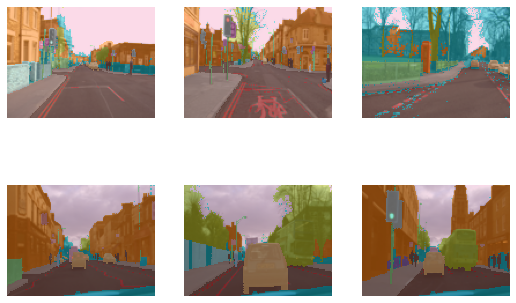

In [8]:
dls.show_batch(max_n=6)

A traditional CNN doesn't work for segmentation; we use a special kind of model called a UNet. So we use `unet_learner` to create our `Learner`.

In [9]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(6)

epoch,train_loss,valid_loss,time
0,2.905566,2.016695,00:04


epoch,train_loss,valid_loss,time
0,1.799236,1.573274,00:01
1,1.541558,1.293306,00:01
2,1.350324,1.001553,00:01
3,1.186754,0.941967,00:01
4,1.067865,0.868811,00:01
5,0.972798,0.867281,00:01


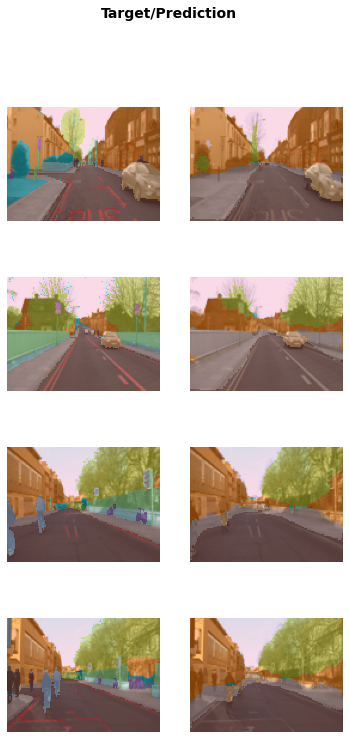

In [10]:
learn.show_results(max_n=4)

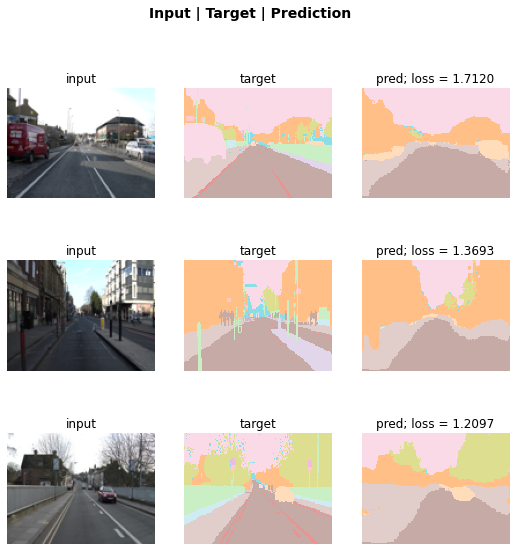

In [11]:
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses(k=3)

### Using the DataBlock API

The `DataBlock` object is itself empty and only contains the instructions on how to create your dataloader:
- the data types, specified using `blocks`; here we pass `ImageBlock` and `MaskBlock`
- how to retrieve the raw data; here we use `get_image_files`
- how to retrieve the labels; here we use `label_func`
- how to split the dataset; here we use `RandomSplitter`
- how to transform the raw data; here we use only `batch_tfms` for image augmentation

In [8]:
camvid = DataBlock(blocks = (ImageBlock, MaskBlock),
                   get_items = get_image_files,
                   get_y = label_func,
                   splitter = RandomSplitter(),
                   batch_tfms = aug_transforms(size=(120,160)))

In [9]:
dls = camvid.dataloaders(path/"images", path=path, bs=8)

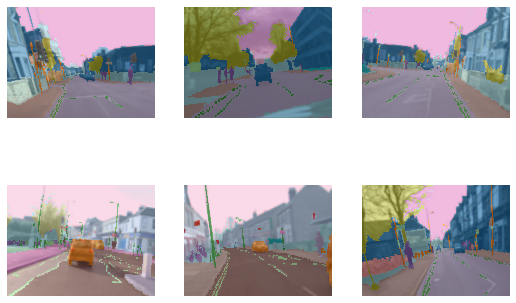

In [11]:
dls.show_batch(max_n=6)

### Footnotes

{{ '[Placeholder](https://placeholder.com)' | fndetail: 1 }}